Task 1 (Generators and lists comprehensions refresher)
Calculate a value of a polynomial for a vector of x coordinates using: (a) single line list comprehension expression and (b) a generator.

p(x)=c0+c1x+c2x2+…+cnxn

Hint! You must apply the enumerate() and sum() functions

Test code:

c = [1,2,3]
x = [0, 2, 4, 8]
p = _____
print(p)

Should print:
[1, 17, 57, 209]

where c is the vector of coefficients of a polynomial: p(x) = c(0) + c(1)*x + c(2)*x**2.


In [1]:
# coefficients
c = [1, 2, 3]
x = [0, 2, 4, 8]

# (a) list comprehension
p_list = [sum(coef * (xi ** power) for power, coef in enumerate(c)) for xi in x]

# (b) generator (example usage: list() to see values)
p_gen = (sum(coef * (xi ** power) for power, coef in enumerate(c)) for xi in x)

print(p_list)      # [1, 17, 57, 209]
print(list(p_gen)) # [1, 17, 57, 209]

[1, 17, 57, 209]
[1, 17, 57, 209]



Task 2
Generate a smooth plot of the polynomial function from Task 1 using dense vector of x coordinates samples for x∈<0,8>
:

n = 100
xd = ...
Example of using a plot:

import matplotlib.pyplot as plt
x = [...]
y = [x**2 for x in x]
plt.plot(x,y)
Expected result:


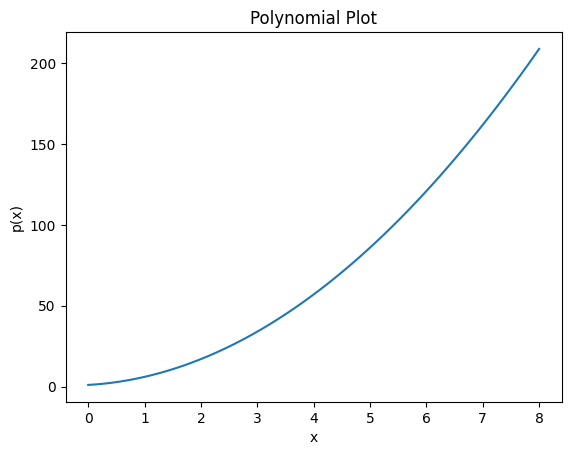

In [2]:
import matplotlib.pyplot as plt
import numpy as np

c = [1, 2, 3]
n = 100

xd = np.linspace(0, 8, n)
yd = [sum(coef * (xi ** power) for power, coef in enumerate(c)) for xi in xd]

plt.plot(xd, yd)
plt.title("Polynomial Plot")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

Task 3
Lets get back to History_of_poland.md file. Let we try to find an average value of digits in lines. But, let we assume that the evaluation cost of determining average values of digits is expensive. (I know it it isn't. But let we just agree for this for a moment.) Now we want to randomly choose for example 10% of lines from the file and assume that this is a representative group. Now we can calculate average value of digits for this group. To complete the task we shall do:

Implement a function in form of a function generator which will return on request a portion of given size of lines (a batch) from file only when the the new portion will be below 10% of the files size.
Implement a function which will use the lines generator to find average value of digits in lines.
Script outline:

def get_lines_batch(batchsize, filename, test_ratio=0.1):
   "You should use yield somewhere here"
   pass

def get_mean_digits(filename, test_ratio):
   "You should use the get_lines_batch above"
   pass

get_mean_digits('History_of_poland.md', 0.1)

In [9]:
import random

def get_lines_batch(batchsize, filename, test_ratio=0.1):
    with open(filename, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    total_lines = len(lines)
    max_batch_size = int(total_lines * test_ratio)

    if batchsize > max_batch_size:
        batchsize = max_batch_size

    # Yield random batches of lines of size batchsize
    for _ in range(0, total_lines, batchsize):
        batch = random.sample(lines, batchsize)
        yield batch

def get_mean_digits(filename, test_ratio=0.1):
    batches = get_lines_batch(batchsize=10, filename=filename, test_ratio=test_ratio)
    digits_counts = []
    for batch in batches:
        for line in batch:
            digits_counts.append(sum(c.isdigit() for c in line))
        break  # Only one batch

    mean_digits = sum(digits_counts) / len(digits_counts) if digits_counts else 0
    print(f"Average digits per line in sampled batch: {mean_digits:.2f}")


get_mean_digits('./Ex1_HistoryfPoland.md', 0.1)

Average digits per line in sampled batch: 18.40


Task 4
Using a list comprehension with conditional expression, convert all occurrences of the letter 'e' in the following string to uppercase: 'thepurposeoflife is extremelly important'

You can use ''.join( alist ) to join a list of characters into a single string.

upperstr = 'thepurposeoflife is extremelly important'
upperstr = ______
print(upperstr)

In [10]:
upperstr = 'thepurposeoflife is extremelly important'
upperstr = ''.join([ch.upper() if ch == 'e' else ch for ch in upperstr])
print(upperstr)

thEpurposEoflifE is ExtrEmElly important


Task 5 - tuples as records
Use the following tuple of tuples
records = (('Sam', 19, 'CS'),
('Nicole', 21, 'Biochemistry'),
('Paul', 20, 'Fine Arts'),
('Ashley', 18, 'History'))
iterate over the records, unpack them, and print the tuples in a formatted form
this might be useful syntax for printing:
print('%s and %d and %s', % ('a string', 10, 'another string'))
Make two functions to complete the following tasks:
def showrecords(records):  
    '''Unpack records stored in a tuple of tuples and print each one in a nice format'''
    ...  
def mean_records(records):  
    '''Unpack records stored in a tuple of tuples and an average value of second column in a nice format'''
    ...  
showrecords(___)
mean_records(___)

In [11]:
records = (
    ('Sam', 19, 'CS'),
    ('Nicole', 21, 'Biochemistry'),
    ('Paul', 20, 'Fine Arts'),
    ('Ashley', 18, 'History')
)

def showrecords(records):
    for name, age, major in records:
        print('%s is %d years old and studies %s' % (name, age, major))

def mean_records(records):
    ages = [age for _, age, _ in records]
    mean_age = sum(ages) / len(ages)
    print('Average age is %.2f' % mean_age)

showrecords(records)
mean_records(records)

Sam is 19 years old and studies CS
Nicole is 21 years old and studies Biochemistry
Paul is 20 years old and studies Fine Arts
Ashley is 18 years old and studies History
Average age is 19.50


Task 6 - Closures
Make a nested function and a python closure which will do possible making functions to get multiple multiplication functions. That is using closures, one could make functions to create multiply_with_5() or multiply_with_4() functions using closures. The closure should take scalar multiple coefficient.

def multiplier_of(x):
  ____

# test code
multiply_with_5 = multiplier_of(5)
print(multiply_with_5(9))
# should return 45

multiply_with_45 = multiplier_of(multiply_with_5(9))
print(multiply_with_45(2))
# should return: 90


In [13]:
def multiplier_of(x):
    def multiplier(n):
        return x * n
    return multiplier

# Test
multiply_with_5 = multiplier_of(5)
print(multiply_with_5(9))

multiply_with_45 = multiplier_of(multiply_with_5(9))
print(multiply_with_45(2))


45
90


Task 7 - decorators with arguments
Make a decorator factory which returns a decorator that decorates functions with one argument. The factory should take one argument, a type, and then returns a decorator that makes function should check if the input is the correct type. If it is wrong, it should print("Bad Type") (In reality, it should raise an error, but error raising we'll do in next task.). Look at the expected output to see what it is if you are confused (I know I would be.) Using isinstance(object, type_of_object) or type(object) might help.

def type_check(correct_type):
    def check(old_function):

        ____

    return check
  
# Use  isinstance(arg, correct_type) to check if arg is of correct type

@type_check(int)
def times2(num):
    return num*2

print(times2(2))
times2('Not A Number')

@type_check(str)
def first_letter(word):
    return word[0]

print(first_letter('Hello World'))
first_letter(['Not', 'A', 'String'])
Should produce:

4
Bad Type
H
Bad Type

In [14]:
def type_check(correct_type):
    def check(old_function):
        def new_function(arg):
            if not isinstance(arg, correct_type):
                print("Bad Type")
                return
            return old_function(arg)
        return new_function
    return check

@type_check(int)
def times2(num):
    return num * 2

print(times2(2))      
times2('Not A Number')

@type_check(str)
def first_letter(word):
    return word[0]

print(first_letter('Hello World'))
first_letter(['Not', 'A', 'String'])


4
Bad Type
H
Bad Type


Task 8 - Registering Plugins
Key takeaway: global variables, statefull decorators.

Decorators don’t have to wrap the function they’re decorating. They can also simply register that a function exists and return it unwrapped. This can be used, for instance, to create a light-weight plug-in architecture:

import random
PLUGINS = dict()

def register(func):
    ______

@register
def say_hello(name):
    return f"Hello {name}"

@register
def be_awesome(name):
    return f"Yo {name}, together we are the awesomest!"

def randomly_greet(name):
    greeter, greeter_func = random.choice(list(PLUGINS.items()))
    print(f"Using {greeter!r}")
    return greeter_func(name)
  
randomly_greet('John')  

In [18]:
import random

PLUGINS = dict()

def register(func):
    PLUGINS[func.__name__] = func
    return func

@register
def say_hello(name):
    return f"Hello {name}"

@register
def be_awesome(name):
    return f"Yo {name}, together we are the awesomest!"

def randomly_greet(name):
    greeter, greeter_func = random.choice(list(PLUGINS.items()))
    print(f"Using {greeter!r}")
    return greeter_func(name)

print(randomly_greet('John'))


Using 'say_hello'
Hello John
